In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
from datetime import *
from matplotlib import pyplot as plt
from dateutil.relativedelta import relativedelta

In [2]:
emu = ['Austria','Belgium','Croatia','Cyprus','Estonia','Finland','France','Germany','Greece','Ireland','Italy',
       'Latvia','Lithuania','Luxembourg','Malta','Netherlands','Portugal','Slovakia','Slovenia','Spain']
# adv = ['United States','United Kingdom','Canada','Australia','New Zealand','Japan','South Korea','Norway','Switzerland',
#        'Bulgaria','Czech Republic','Hungary','Poland','Romania','Sweden','Denmark']
adv = ['United States']

### Inflation

Conditional and unconditional archvies have been succesfully merged


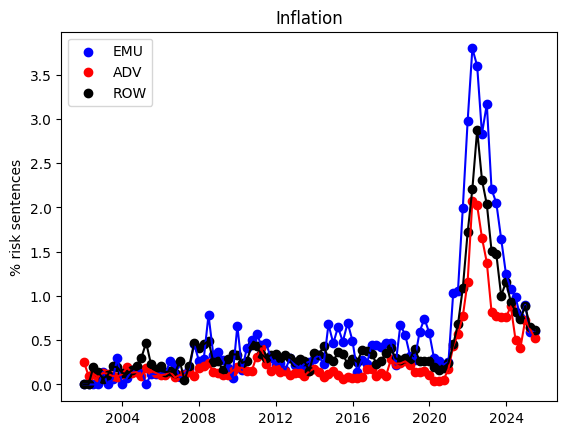

In [3]:
df = pd.read_csv('NLAnalytics_Inflation.csv')
df_unc = pd.read_csv('NLAnalytics_Inflation_unconditional.csv')
df_unc.rename(columns={'nr_of_sentences':'n_of_sentences'},inplace=True)
df_tot = df.merge(df_unc,on='earningscallID',how='inner')
if sum(df_tot['nr_of_sentences'] == df_tot['n_of_sentences'])/len(df_tot) == 1:
    print('Conditional and unconditional archvies have been succesfully merged')
else:
    print('Conditional and unconditional archvies have not been succesfully merged. Please check')

quarter_ref = list()
[quarter_ref.append(pd.to_datetime(quarter,format='%Y-%m-%d') - relativedelta(days=1) ) for quarter in df_tot.date_q];
df_tot['date_q'] = quarter_ref

region = list()
for i in df_tot.index:
    if df_tot.headquarterscountry[i] in emu:
        region.append('EMU')
    elif df_tot.headquarterscountry[i] in adv:
        region.append('ADV')
    else:
        region.append('ROW')
df_tot['region'] = region

df_emu = df_tot.loc[df_tot.region == 'EMU']
tot_sentences_emu = df_emu.resample('QE',on='date_q')['nr_of_sentences'].sum()
exposure_emu = df_emu.resample('QE',on='date_q')['exposure'].sum() 	
risk_emu = df_emu.resample('QE',on='date_q')['risk'].sum() 	
sentiment_emu = df_emu.resample('QE',on='date_q')['sentiment'].sum() 	
positive_emu = df_emu.resample('QE',on='date_q')['positive'].sum() 	
negative_emu = df_emu.resample('QE',on='date_q')['negative'].sum()
positive_unc_emu = df_emu.resample('QE',on='date_q')['unconditional_positive_sentences_count'].sum()
negative_unc_emu = df_emu.resample('QE',on='date_q')['unconditional_negative_sentences_count'].sum()
risk_unc_emu = df_emu.resample('QE',on='date_q')['unconditional_risk_sentences_count'].sum()

df_adv = df_tot.loc[df_tot.region == 'ADV']
tot_sentences_adv = df_adv.resample('QE',on='date_q')['nr_of_sentences'].sum()
exposure_adv = df_adv.resample('QE',on='date_q')['exposure'].sum() 	
risk_adv = df_adv.resample('QE',on='date_q')['risk'].sum() 	
sentiment_adv = df_adv.resample('QE',on='date_q')['sentiment'].sum() 	
positive_adv = df_adv.resample('QE',on='date_q')['positive'].sum() 	
negative_adv = df_adv.resample('QE',on='date_q')['negative'].sum()
positive_unc_adv = df_adv.resample('QE',on='date_q')['unconditional_positive_sentences_count'].sum()
negative_unc_adv = df_adv.resample('QE',on='date_q')['unconditional_negative_sentences_count'].sum()
risk_unc_adv = df_adv.resample('QE',on='date_q')['unconditional_risk_sentences_count'].sum()

df_row = df_tot.loc[df_tot.region == 'ROW']
tot_sentences_row = df_row.resample('QE',on='date_q')['nr_of_sentences'].sum()
exposure_row = df_row.resample('QE',on='date_q')['exposure'].sum() 	
risk_row = df_row.resample('QE',on='date_q')['risk'].sum() 	
sentiment_row = df_row.resample('QE',on='date_q')['sentiment'].sum() 	
positive_row = df_row.resample('QE',on='date_q')['positive'].sum() 	
negative_row = df_row.resample('QE',on='date_q')['negative'].sum()
positive_unc_row = df_row.resample('QE',on='date_q')['unconditional_positive_sentences_count'].sum()
negative_unc_row = df_row.resample('QE',on='date_q')['unconditional_negative_sentences_count'].sum()
risk_unc_row = df_row.resample('QE',on='date_q')['unconditional_risk_sentences_count'].sum()

df_inflation = pd.DataFrame()
df_inflation['Inflation_EMU'] = risk_emu/risk_unc_emu*100
df_inflation['Inflation_ADV'] = risk_adv/risk_unc_adv*100
df_inflation['Inflation_ROW'] = risk_row/risk_unc_row*100
fig,ax = plt.subplots(1,1)
ax.plot(df_inflation.Inflation_EMU,color='blue')
ax.scatter(df_inflation.index,df_inflation.Inflation_EMU,label='EMU',color='blue')
ax.plot(df_inflation.Inflation_ADV,color='red')
ax.scatter(df_inflation.index,df_inflation.Inflation_ADV,label='ADV',color='red')
ax.plot(df_inflation.Inflation_ROW,color='k')
ax.scatter(df_inflation.index,df_inflation.Inflation_ROW,label='ROW',color='k')
ax.legend()
ax.set_title('Inflation')
ax.set_ylabel('% risk sentences')
plt.show()

### Supply Chain

Conditional and unconditional archvies have been succesfully merged


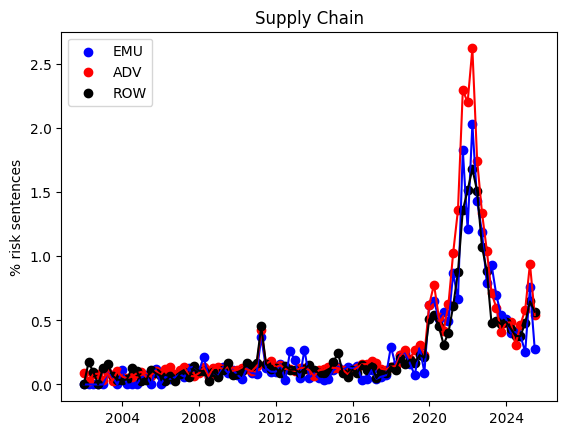

In [4]:
df = pd.read_csv('NLAnalytics_SupplyChain.csv')
df_unc = pd.read_csv('NLAnalytics_SupplyChain_unconditional.csv')
df_unc.rename(columns={'nr_of_sentences':'n_of_sentences'},inplace=True)
df_tot = df.merge(df_unc,on='earningscallID',how='inner')
if sum(df_tot['nr_of_sentences'] == df_tot['n_of_sentences'])/len(df_tot) == 1:
    print('Conditional and unconditional archvies have been succesfully merged')
else:
    print('Conditional and unconditional archvies have not been succesfully merged. Please check')

quarter_ref = list()
[quarter_ref.append(pd.to_datetime(quarter,format='%Y-%m-%d') - relativedelta(days=1) ) for quarter in df_tot.date_q];
df_tot['date_q'] = quarter_ref

region = list()
for i in df_tot.index:
    if df_tot.headquarterscountry[i] in emu:
        region.append('EMU')
    elif df_tot.headquarterscountry[i] in adv:
        region.append('ADV')
    else:
        region.append('ROW')
df_tot['region'] = region

df_emu = df_tot.loc[df_tot.region == 'EMU']
tot_sentences_emu = df_emu.resample('QE',on='date_q')['nr_of_sentences'].sum()
exposure_emu = df_emu.resample('QE',on='date_q')['exposure'].sum() 	
risk_emu = df_emu.resample('QE',on='date_q')['risk'].sum() 	
sentiment_emu = df_emu.resample('QE',on='date_q')['sentiment'].sum() 	
positive_emu = df_emu.resample('QE',on='date_q')['positive'].sum() 	
negative_emu = df_emu.resample('QE',on='date_q')['negative'].sum()
positive_unc_emu = df_emu.resample('QE',on='date_q')['unconditional_positive_sentences_count'].sum()
negative_unc_emu = df_emu.resample('QE',on='date_q')['unconditional_negative_sentences_count'].sum()
risk_unc_emu = df_emu.resample('QE',on='date_q')['unconditional_risk_sentences_count'].sum()

df_adv = df_tot.loc[df_tot.region == 'ADV']
tot_sentences_adv = df_adv.resample('QE',on='date_q')['nr_of_sentences'].sum()
exposure_adv = df_adv.resample('QE',on='date_q')['exposure'].sum() 	
risk_adv = df_adv.resample('QE',on='date_q')['risk'].sum() 	
sentiment_adv = df_adv.resample('QE',on='date_q')['sentiment'].sum() 	
positive_adv = df_adv.resample('QE',on='date_q')['positive'].sum() 	
negative_adv = df_adv.resample('QE',on='date_q')['negative'].sum()
positive_unc_adv = df_adv.resample('QE',on='date_q')['unconditional_positive_sentences_count'].sum()
negative_unc_adv = df_adv.resample('QE',on='date_q')['unconditional_negative_sentences_count'].sum()
risk_unc_adv = df_adv.resample('QE',on='date_q')['unconditional_risk_sentences_count'].sum()

df_row = df_tot.loc[df_tot.region == 'ROW']
tot_sentences_row = df_row.resample('QE',on='date_q')['nr_of_sentences'].sum()
exposure_row = df_row.resample('QE',on='date_q')['exposure'].sum() 	
risk_row = df_row.resample('QE',on='date_q')['risk'].sum() 	
sentiment_row = df_row.resample('QE',on='date_q')['sentiment'].sum() 	
positive_row = df_row.resample('QE',on='date_q')['positive'].sum() 	
negative_row = df_row.resample('QE',on='date_q')['negative'].sum()
positive_unc_row = df_row.resample('QE',on='date_q')['unconditional_positive_sentences_count'].sum()
negative_unc_row = df_row.resample('QE',on='date_q')['unconditional_negative_sentences_count'].sum()
risk_unc_row = df_row.resample('QE',on='date_q')['unconditional_risk_sentences_count'].sum()

# df_supplychain = pd.DataFrame(index=quarters)
df_supplychain = pd.DataFrame()
df_supplychain['SupplyChain_EMU'] = risk_emu/risk_unc_emu*100
df_supplychain['SupplyChain_ADV'] = risk_adv/risk_unc_adv*100
df_supplychain['SupplyChain_ROW'] = risk_row/risk_unc_row*100
fig,ax = plt.subplots(1,1)
ax.plot(df_supplychain.SupplyChain_EMU,color='blue')
ax.scatter(df_supplychain.index,df_supplychain.SupplyChain_EMU,label='EMU',color='blue')
ax.plot(df_supplychain.SupplyChain_ADV,color='red')
ax.scatter(df_supplychain.index,df_supplychain.SupplyChain_ADV,label='ADV',color='red')
ax.plot(df_supplychain.SupplyChain_ROW,color='k')
ax.scatter(df_supplychain.index,df_supplychain.SupplyChain_ROW,label='ROW',color='k')
ax.legend()
ax.set_title('Supply Chain')
ax.set_ylabel('% risk sentences')
plt.show()

### Monetary Policy

Conditional and unconditional archvies have been succesfully merged


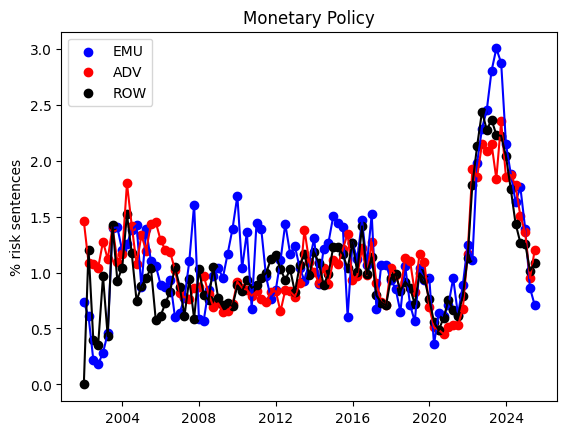

In [5]:
df = pd.read_csv('NLAnalytics_MonetaryPolicy.csv')
df_unc = pd.read_csv('NLAnalytics_MonetaryPolicy_unconditional.csv')
df_unc.rename(columns={'nr_of_sentences':'n_of_sentences'},inplace=True)
df_tot = df.merge(df_unc,on='earningscallID',how='inner')
if sum(df_tot['nr_of_sentences'] == df_tot['n_of_sentences'])/len(df_tot) == 1:
    print('Conditional and unconditional archvies have been succesfully merged')
else:
    print('Conditional and unconditional archvies have not been succesfully merged. Please check')

quarter_ref = list()
[quarter_ref.append(pd.to_datetime(quarter,format='%Y-%m-%d') - relativedelta(days=1) ) for quarter in df_tot.date_q];
df_tot['date_q'] = quarter_ref

region = list()
for i in df_tot.index:
    if df_tot.headquarterscountry[i] in emu:
        region.append('EMU')
    elif df_tot.headquarterscountry[i] in adv:
        region.append('ADV')
    else:
        region.append('ROW')
df_tot['region'] = region

df_emu = df_tot.loc[df_tot.region == 'EMU']
tot_sentences_emu = df_emu.resample('QE',on='date_q')['nr_of_sentences'].sum()
exposure_emu = df_emu.resample('QE',on='date_q')['exposure'].sum() 	
risk_emu = df_emu.resample('QE',on='date_q')['risk'].sum() 	
sentiment_emu = df_emu.resample('QE',on='date_q')['sentiment'].sum() 	
positive_emu = df_emu.resample('QE',on='date_q')['positive'].sum() 	
negative_emu = df_emu.resample('QE',on='date_q')['negative'].sum()
positive_unc_emu = df_emu.resample('QE',on='date_q')['unconditional_positive_sentences_count'].sum()
negative_unc_emu = df_emu.resample('QE',on='date_q')['unconditional_negative_sentences_count'].sum()
risk_unc_emu = df_emu.resample('QE',on='date_q')['unconditional_risk_sentences_count'].sum()

df_adv = df_tot.loc[df_tot.region == 'ADV']
tot_sentences_adv = df_adv.resample('QE',on='date_q')['nr_of_sentences'].sum()
exposure_adv = df_adv.resample('QE',on='date_q')['exposure'].sum() 	
risk_adv = df_adv.resample('QE',on='date_q')['risk'].sum() 	
sentiment_adv = df_adv.resample('QE',on='date_q')['sentiment'].sum() 	
positive_adv = df_adv.resample('QE',on='date_q')['positive'].sum() 	
negative_adv = df_adv.resample('QE',on='date_q')['negative'].sum()
positive_unc_adv = df_adv.resample('QE',on='date_q')['unconditional_positive_sentences_count'].sum()
negative_unc_adv = df_adv.resample('QE',on='date_q')['unconditional_negative_sentences_count'].sum()
risk_unc_adv = df_adv.resample('QE',on='date_q')['unconditional_risk_sentences_count'].sum()

df_row = df_tot.loc[df_tot.region == 'ROW']
tot_sentences_row = df_row.resample('QE',on='date_q')['nr_of_sentences'].sum()
exposure_row = df_row.resample('QE',on='date_q')['exposure'].sum() 	
risk_row = df_row.resample('QE',on='date_q')['risk'].sum() 	
sentiment_row = df_row.resample('QE',on='date_q')['sentiment'].sum() 	
positive_row = df_row.resample('QE',on='date_q')['positive'].sum() 	
negative_row = df_row.resample('QE',on='date_q')['negative'].sum()
positive_unc_row = df_row.resample('QE',on='date_q')['unconditional_positive_sentences_count'].sum()
negative_unc_row = df_row.resample('QE',on='date_q')['unconditional_negative_sentences_count'].sum()
risk_unc_row = df_row.resample('QE',on='date_q')['unconditional_risk_sentences_count'].sum()

# df_monetarypolicy = pd.DataFrame(index=quarters)
df_monetarypolicy = pd.DataFrame()
df_monetarypolicy['MonetaryPolicy_EMU'] = risk_emu/risk_unc_emu*100
df_monetarypolicy['MonetaryPolicy_ADV'] = risk_adv/risk_unc_adv*100
df_monetarypolicy['MonetaryPolicy_ROW'] = risk_row/risk_unc_row*100
fig,ax = plt.subplots(1,1)
ax.plot(df_monetarypolicy.MonetaryPolicy_EMU,color='blue')
ax.scatter(df_monetarypolicy.index,df_monetarypolicy.MonetaryPolicy_EMU,label='EMU',color='blue')
ax.plot(df_monetarypolicy.MonetaryPolicy_ADV,color='red')
ax.scatter(df_monetarypolicy.index,df_monetarypolicy.MonetaryPolicy_ADV,label='ADV',color='red')
ax.plot(df_monetarypolicy.MonetaryPolicy_ROW,color='k')
ax.scatter(df_monetarypolicy.index,df_monetarypolicy.MonetaryPolicy_ROW,label='ROW',color='k')
ax.legend()
ax.set_title('Monetary Policy')
ax.set_ylabel('% risk sentences')
plt.show()

### Financing Conditions

Conditional and unconditional archvies have been succesfully merged


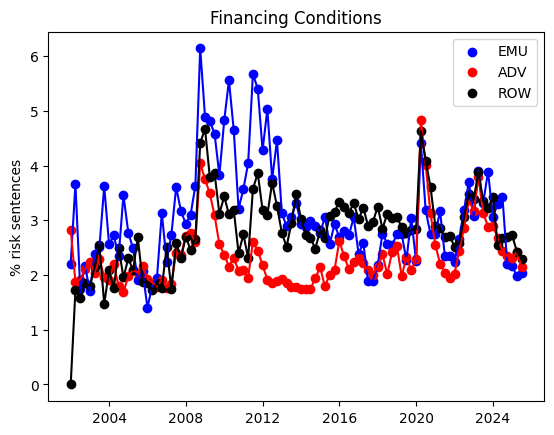

In [6]:
df = pd.read_csv('NLAnalytics_FinancingConditions.csv')
df_unc = pd.read_csv('NLAnalytics_FinancingConditions_unconditional.csv')
df_unc.rename(columns={'nr_of_sentences':'n_of_sentences'},inplace=True)
df_tot = df.merge(df_unc,on='earningscallID',how='inner')
if sum(df_tot['nr_of_sentences'] == df_tot['n_of_sentences'])/len(df_tot) == 1:
    print('Conditional and unconditional archvies have been succesfully merged')
else:
    print('Conditional and unconditional archvies have not been succesfully merged. Please check')

quarter_ref = list()
[quarter_ref.append(pd.to_datetime(quarter,format='%Y-%m-%d') - relativedelta(days=1) ) for quarter in df_tot.date_q];
df_tot['date_q'] = quarter_ref

region = list()
for i in df_tot.index:
    if df_tot.headquarterscountry[i] in emu:
        region.append('EMU')
    elif df_tot.headquarterscountry[i] in adv:
        region.append('ADV')
    else:
        region.append('ROW')
df_tot['region'] = region

df_emu = df_tot.loc[df_tot.region == 'EMU']
tot_sentences_emu = df_emu.resample('QE',on='date_q')['nr_of_sentences'].sum()
exposure_emu = df_emu.resample('QE',on='date_q')['exposure'].sum() 	
risk_emu = df_emu.resample('QE',on='date_q')['risk'].sum() 	
sentiment_emu = df_emu.resample('QE',on='date_q')['sentiment'].sum() 	
positive_emu = df_emu.resample('QE',on='date_q')['positive'].sum() 	
negative_emu = df_emu.resample('QE',on='date_q')['negative'].sum()
positive_unc_emu = df_emu.resample('QE',on='date_q')['unconditional_positive_sentences_count'].sum()
negative_unc_emu = df_emu.resample('QE',on='date_q')['unconditional_negative_sentences_count'].sum()
risk_unc_emu = df_emu.resample('QE',on='date_q')['unconditional_risk_sentences_count'].sum()

df_adv = df_tot.loc[df_tot.region == 'ADV']
tot_sentences_adv = df_adv.resample('QE',on='date_q')['nr_of_sentences'].sum()
exposure_adv = df_adv.resample('QE',on='date_q')['exposure'].sum() 	
risk_adv = df_adv.resample('QE',on='date_q')['risk'].sum() 	
sentiment_adv = df_adv.resample('QE',on='date_q')['sentiment'].sum() 	
positive_adv = df_adv.resample('QE',on='date_q')['positive'].sum() 	
negative_adv = df_adv.resample('QE',on='date_q')['negative'].sum()
positive_unc_adv = df_adv.resample('QE',on='date_q')['unconditional_positive_sentences_count'].sum()
negative_unc_adv = df_adv.resample('QE',on='date_q')['unconditional_negative_sentences_count'].sum()
risk_unc_adv = df_adv.resample('QE',on='date_q')['unconditional_risk_sentences_count'].sum()

df_row = df_tot.loc[df_tot.region == 'ROW']
tot_sentences_row = df_row.resample('QE',on='date_q')['nr_of_sentences'].sum()
exposure_row = df_row.resample('QE',on='date_q')['exposure'].sum() 	
risk_row = df_row.resample('QE',on='date_q')['risk'].sum() 	
sentiment_row = df_row.resample('QE',on='date_q')['sentiment'].sum() 	
positive_row = df_row.resample('QE',on='date_q')['positive'].sum() 	
negative_row = df_row.resample('QE',on='date_q')['negative'].sum()
positive_unc_row = df_row.resample('QE',on='date_q')['unconditional_positive_sentences_count'].sum()
negative_unc_row = df_row.resample('QE',on='date_q')['unconditional_negative_sentences_count'].sum()
risk_unc_row = df_row.resample('QE',on='date_q')['unconditional_risk_sentences_count'].sum()

# df_financingconditions = pd.DataFrame(index=quarters)
df_financingconditions = pd.DataFrame()
df_financingconditions['FinancingConditions_EMU'] = risk_emu/risk_unc_emu*100
df_financingconditions['FinancingConditions_ADV'] = risk_adv/risk_unc_adv*100
df_financingconditions['FinancingConditions_ROW'] = risk_row/risk_unc_row*100
fig,ax = plt.subplots(1,1)
ax.plot(df_financingconditions.FinancingConditions_EMU,color='blue')
ax.scatter(df_financingconditions.index,df_financingconditions.FinancingConditions_EMU,label='EMU',color='blue')
ax.plot(df_financingconditions.FinancingConditions_ADV,color='red')
ax.scatter(df_financingconditions.index,df_financingconditions.FinancingConditions_ADV,label='ADV',color='red')
ax.plot(df_financingconditions.FinancingConditions_ROW,color='k')
ax.scatter(df_financingconditions.index,df_financingconditions.FinancingConditions_ROW,label='ROW',color='k')
ax.legend()
ax.set_title('Financing Conditions')
ax.set_ylabel('% risk sentences')
plt.show()

### COVID19

Conditional and unconditional archvies have been succesfully merged


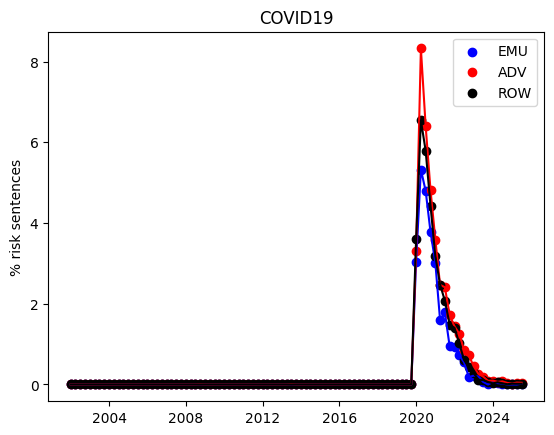

In [7]:
df = pd.read_csv('NLAnalytics_COVID19.csv')
df_unc = pd.read_csv('NLAnalytics_COVID19_unconditional.csv')
df_unc.rename(columns={'nr_of_sentences':'n_of_sentences'},inplace=True)
df_tot = df.merge(df_unc,on='earningscallID',how='inner')
if sum(df_tot['nr_of_sentences'] == df_tot['n_of_sentences'])/len(df_tot) == 1:
    print('Conditional and unconditional archvies have been succesfully merged')
else:
    print('Conditional and unconditional archvies have not been succesfully merged. Please check')

quarter_ref = list()
[quarter_ref.append(pd.to_datetime(quarter,format='%Y-%m-%d') - relativedelta(days=1) ) for quarter in df_tot.date_q];
df_tot['date_q'] = quarter_ref

region = list()
for i in df_tot.index:
    if df_tot.headquarterscountry[i] in emu:
        region.append('EMU')
    elif df_tot.headquarterscountry[i] in adv:
        region.append('ADV')
    else:
        region.append('ROW')
df_tot['region'] = region

df_emu = df_tot.loc[df_tot.region == 'EMU']
tot_sentences_emu = df_emu.resample('QE',on='date_q')['nr_of_sentences'].sum()
exposure_emu = df_emu.resample('QE',on='date_q')['exposure'].sum() 	
risk_emu = df_emu.resample('QE',on='date_q')['risk'].sum() 	
sentiment_emu = df_emu.resample('QE',on='date_q')['sentiment'].sum() 	
positive_emu = df_emu.resample('QE',on='date_q')['positive'].sum() 	
negative_emu = df_emu.resample('QE',on='date_q')['negative'].sum()
positive_unc_emu = df_emu.resample('QE',on='date_q')['unconditional_positive_sentences_count'].sum()
negative_unc_emu = df_emu.resample('QE',on='date_q')['unconditional_negative_sentences_count'].sum()
risk_unc_emu = df_emu.resample('QE',on='date_q')['unconditional_risk_sentences_count'].sum()

df_adv = df_tot.loc[df_tot.region == 'ADV']
tot_sentences_adv = df_adv.resample('QE',on='date_q')['nr_of_sentences'].sum()
exposure_adv = df_adv.resample('QE',on='date_q')['exposure'].sum() 	
risk_adv = df_adv.resample('QE',on='date_q')['risk'].sum() 	
sentiment_adv = df_adv.resample('QE',on='date_q')['sentiment'].sum() 	
positive_adv = df_adv.resample('QE',on='date_q')['positive'].sum() 	
negative_adv = df_adv.resample('QE',on='date_q')['negative'].sum()
positive_unc_adv = df_adv.resample('QE',on='date_q')['unconditional_positive_sentences_count'].sum()
negative_unc_adv = df_adv.resample('QE',on='date_q')['unconditional_negative_sentences_count'].sum()
risk_unc_adv = df_adv.resample('QE',on='date_q')['unconditional_risk_sentences_count'].sum()

df_row = df_tot.loc[df_tot.region == 'ROW']
tot_sentences_row = df_row.resample('QE',on='date_q')['nr_of_sentences'].sum()
exposure_row = df_row.resample('QE',on='date_q')['exposure'].sum() 	
risk_row = df_row.resample('QE',on='date_q')['risk'].sum() 	
sentiment_row = df_row.resample('QE',on='date_q')['sentiment'].sum() 	
positive_row = df_row.resample('QE',on='date_q')['positive'].sum() 	
negative_row = df_row.resample('QE',on='date_q')['negative'].sum()
positive_unc_row = df_row.resample('QE',on='date_q')['unconditional_positive_sentences_count'].sum()
negative_unc_row = df_row.resample('QE',on='date_q')['unconditional_negative_sentences_count'].sum()
risk_unc_row = df_row.resample('QE',on='date_q')['unconditional_risk_sentences_count'].sum()

# df_covid19 = pd.DataFrame(index=quarters)
df_covid19 = pd.DataFrame()
df_covid19['COVID19_EMU'] = risk_emu/risk_unc_emu*100
df_covid19['COVID19_ADV'] = risk_adv/risk_unc_adv*100
df_covid19['COVID19_ROW'] = risk_row/risk_unc_row*100
fig,ax = plt.subplots(1,1)
ax.plot(df_covid19.COVID19_EMU,color='blue')
ax.scatter(df_covid19.index,df_covid19.COVID19_EMU,label='EMU',color='blue')
ax.plot(df_covid19.COVID19_ADV,color='red')
ax.scatter(df_covid19.index,df_covid19.COVID19_ADV,label='ADV',color='red')
ax.plot(df_covid19.COVID19_ROW,color='k')
ax.scatter(df_covid19.index,df_covid19.COVID19_ROW,label='ROW',color='k')
ax.legend()
ax.set_title('COVID19')
ax.set_ylabel('% risk sentences')
plt.show()

### Geopolitical Ukraine

Conditional and unconditional archvies have been succesfully merged


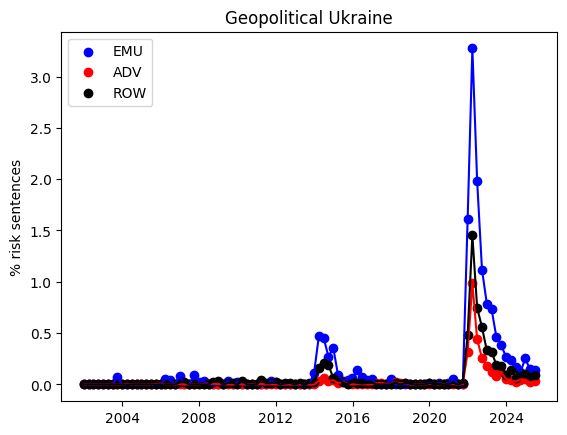

In [8]:
df = pd.read_csv('NLAnalytics_GeoUkraine.csv')
df_unc = pd.read_csv('NLAnalytics_GeoUkraine_unconditional.csv')
df_unc.rename(columns={'nr_of_sentences':'n_of_sentences'},inplace=True)
df_tot = df.merge(df_unc,on='earningscallID',how='inner')
if sum(df_tot['nr_of_sentences'] == df_tot['n_of_sentences'])/len(df_tot) == 1:
    print('Conditional and unconditional archvies have been succesfully merged')
else:
    print('Conditional and unconditional archvies have not been succesfully merged. Please check')

quarter_ref = list()
[quarter_ref.append(pd.to_datetime(quarter,format='%Y-%m-%d') - relativedelta(days=1) ) for quarter in df_tot.date_q];
df_tot['date_q'] = quarter_ref

region = list()
for i in df_tot.index:
    if df_tot.headquarterscountry[i] in emu:
        region.append('EMU')
    elif df_tot.headquarterscountry[i] in adv:
        region.append('ADV')
    else:
        region.append('ROW')
df_tot['region'] = region

df_emu = df_tot.loc[df_tot.region == 'EMU']
tot_sentences_emu = df_emu.resample('QE',on='date_q')['nr_of_sentences'].sum()
exposure_emu = df_emu.resample('QE',on='date_q')['exposure'].sum() 	
risk_emu = df_emu.resample('QE',on='date_q')['risk'].sum() 	
sentiment_emu = df_emu.resample('QE',on='date_q')['sentiment'].sum() 	
positive_emu = df_emu.resample('QE',on='date_q')['positive'].sum() 	
negative_emu = df_emu.resample('QE',on='date_q')['negative'].sum()
positive_unc_emu = df_emu.resample('QE',on='date_q')['unconditional_positive_sentences_count'].sum()
negative_unc_emu = df_emu.resample('QE',on='date_q')['unconditional_negative_sentences_count'].sum()
risk_unc_emu = df_emu.resample('QE',on='date_q')['unconditional_risk_sentences_count'].sum()

df_adv = df_tot.loc[df_tot.region == 'ADV']
tot_sentences_adv = df_adv.resample('QE',on='date_q')['nr_of_sentences'].sum()
exposure_adv = df_adv.resample('QE',on='date_q')['exposure'].sum() 	
risk_adv = df_adv.resample('QE',on='date_q')['risk'].sum() 	
sentiment_adv = df_adv.resample('QE',on='date_q')['sentiment'].sum() 	
positive_adv = df_adv.resample('QE',on='date_q')['positive'].sum() 	
negative_adv = df_adv.resample('QE',on='date_q')['negative'].sum()
positive_unc_adv = df_adv.resample('QE',on='date_q')['unconditional_positive_sentences_count'].sum()
negative_unc_adv = df_adv.resample('QE',on='date_q')['unconditional_negative_sentences_count'].sum()
risk_unc_adv = df_adv.resample('QE',on='date_q')['unconditional_risk_sentences_count'].sum()

df_row = df_tot.loc[df_tot.region == 'ROW']
tot_sentences_row = df_row.resample('QE',on='date_q')['nr_of_sentences'].sum()
exposure_row = df_row.resample('QE',on='date_q')['exposure'].sum() 	
risk_row = df_row.resample('QE',on='date_q')['risk'].sum() 	
sentiment_row = df_row.resample('QE',on='date_q')['sentiment'].sum() 	
positive_row = df_row.resample('QE',on='date_q')['positive'].sum() 	
negative_row = df_row.resample('QE',on='date_q')['negative'].sum()
positive_unc_row = df_row.resample('QE',on='date_q')['unconditional_positive_sentences_count'].sum()
negative_unc_row = df_row.resample('QE',on='date_q')['unconditional_negative_sentences_count'].sum()
risk_unc_row = df_row.resample('QE',on='date_q')['unconditional_risk_sentences_count'].sum()

# df_geoukraine = pd.DataFrame(index=quarters)
df_geoukraine = pd.DataFrame()
df_geoukraine['GeoUkraine_EMU'] = risk_emu/risk_unc_emu*100
df_geoukraine['GeoUkraine_ADV'] = risk_adv/risk_unc_adv*100
df_geoukraine['GeoUkraine_ROW'] = risk_row/risk_unc_row*100
fig,ax = plt.subplots(1,1)
ax.plot(df_geoukraine.GeoUkraine_EMU,color='blue')
ax.scatter(df_geoukraine.index,df_geoukraine.GeoUkraine_EMU,label='EMU',color='blue')
ax.plot(df_geoukraine.GeoUkraine_ADV,color='red')
ax.scatter(df_geoukraine.index,df_geoukraine.GeoUkraine_ADV,label='ADV',color='red')
ax.plot(df_geoukraine.GeoUkraine_ROW,color='k')
ax.scatter(df_geoukraine.index,df_geoukraine.GeoUkraine_ROW,label='ROW',color='k')
ax.legend()
ax.set_title('Geopolitical Ukraine')
ax.set_ylabel('% risk sentences')
plt.show()

### Geopolitical Middle-East

Conditional and unconditional archvies have been succesfully merged


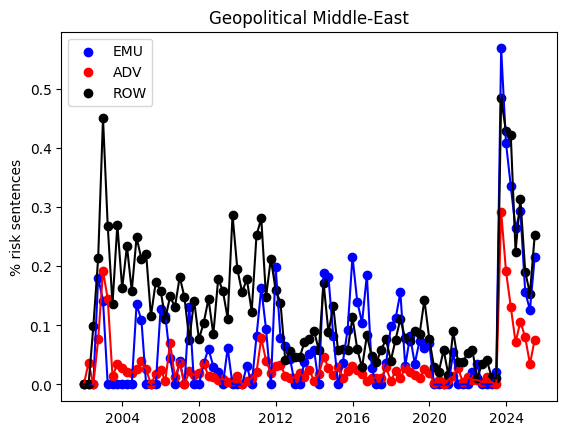

In [9]:
df = pd.read_csv('NLAnalytics_GeoMidEast.csv')
df_unc = pd.read_csv('NLAnalytics_GeoMidEast_unconditional.csv')
df_unc.rename(columns={'nr_of_sentences':'n_of_sentences'},inplace=True)
df_tot = df.merge(df_unc,on='earningscallID',how='inner')
if sum(df_tot['nr_of_sentences'] == df_tot['n_of_sentences'])/len(df_tot) == 1:
    print('Conditional and unconditional archvies have been succesfully merged')
else:
    print('Conditional and unconditional archvies have not been succesfully merged. Please check')

quarter_ref = list()
[quarter_ref.append(pd.to_datetime(quarter,format='%Y-%m-%d') - relativedelta(days=1) ) for quarter in df_tot.date_q];
df_tot['date_q'] = quarter_ref

region = list()
for i in df_tot.index:
    if df_tot.headquarterscountry[i] in emu:
        region.append('EMU')
    elif df_tot.headquarterscountry[i] in adv:
        region.append('ADV')
    else:
        region.append('ROW')
df_tot['region'] = region

df_emu = df_tot.loc[df_tot.region == 'EMU']
tot_sentences_emu = df_emu.resample('QE',on='date_q')['nr_of_sentences'].sum()
exposure_emu = df_emu.resample('QE',on='date_q')['exposure'].sum() 	
risk_emu = df_emu.resample('QE',on='date_q')['risk'].sum() 	
sentiment_emu = df_emu.resample('QE',on='date_q')['sentiment'].sum() 	
positive_emu = df_emu.resample('QE',on='date_q')['positive'].sum() 	
negative_emu = df_emu.resample('QE',on='date_q')['negative'].sum()
positive_unc_emu = df_emu.resample('QE',on='date_q')['unconditional_positive_sentences_count'].sum()
negative_unc_emu = df_emu.resample('QE',on='date_q')['unconditional_negative_sentences_count'].sum()
risk_unc_emu = df_emu.resample('QE',on='date_q')['unconditional_risk_sentences_count'].sum()

df_adv = df_tot.loc[df_tot.region == 'ADV']
tot_sentences_adv = df_adv.resample('QE',on='date_q')['nr_of_sentences'].sum()
exposure_adv = df_adv.resample('QE',on='date_q')['exposure'].sum() 	
risk_adv = df_adv.resample('QE',on='date_q')['risk'].sum() 	
sentiment_adv = df_adv.resample('QE',on='date_q')['sentiment'].sum() 	
positive_adv = df_adv.resample('QE',on='date_q')['positive'].sum() 	
negative_adv = df_adv.resample('QE',on='date_q')['negative'].sum()
positive_unc_adv = df_adv.resample('QE',on='date_q')['unconditional_positive_sentences_count'].sum()
negative_unc_adv = df_adv.resample('QE',on='date_q')['unconditional_negative_sentences_count'].sum()
risk_unc_adv = df_adv.resample('QE',on='date_q')['unconditional_risk_sentences_count'].sum()

df_row = df_tot.loc[df_tot.region == 'ROW']
tot_sentences_row = df_row.resample('QE',on='date_q')['nr_of_sentences'].sum()
exposure_row = df_row.resample('QE',on='date_q')['exposure'].sum() 	
risk_row = df_row.resample('QE',on='date_q')['risk'].sum() 	
sentiment_row = df_row.resample('QE',on='date_q')['sentiment'].sum() 	
positive_row = df_row.resample('QE',on='date_q')['positive'].sum() 	
negative_row = df_row.resample('QE',on='date_q')['negative'].sum()
positive_unc_row = df_row.resample('QE',on='date_q')['unconditional_positive_sentences_count'].sum()
negative_unc_row = df_row.resample('QE',on='date_q')['unconditional_negative_sentences_count'].sum()
risk_unc_row = df_row.resample('QE',on='date_q')['unconditional_risk_sentences_count'].sum()

# df_geomideast = pd.DataFrame(index=quarters)
df_geomideast = pd.DataFrame()
df_geomideast['GeoMidEast_EMU'] = risk_emu/risk_unc_emu*100
df_geomideast['GeoMidEast_ADV'] = risk_adv/risk_unc_adv*100
df_geomideast['GeoMidEast_ROW'] = risk_row/risk_unc_row*100
fig,ax = plt.subplots(1,1)
ax.plot(df_geomideast.GeoMidEast_EMU,color='blue')
ax.scatter(df_geomideast.index,df_geomideast.GeoMidEast_EMU,label='EMU',color='blue')
ax.plot(df_geomideast.GeoMidEast_ADV,color='red')
ax.scatter(df_geomideast.index,df_geomideast.GeoMidEast_ADV,label='ADV',color='red')
ax.plot(df_geomideast.GeoMidEast_ROW,color='k')
ax.scatter(df_geomideast.index,df_geomideast.GeoMidEast_ROW,label='ROW',color='k')
ax.legend()
ax.set_title('Geopolitical Middle-East')
ax.set_ylabel('% risk sentences')
plt.show()

### Tariffs

Conditional and unconditional archvies have been succesfully merged


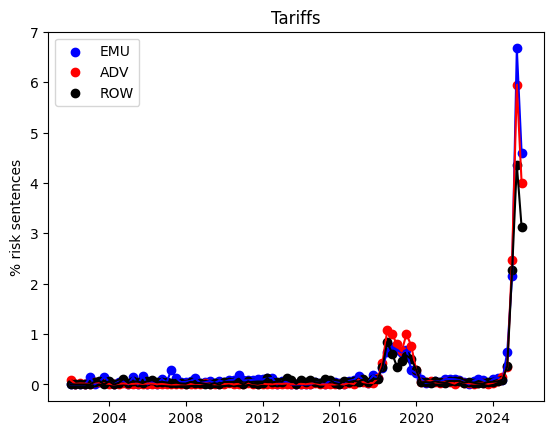

In [10]:
df = pd.read_csv('NLAnalytics_Tariffs.csv')
df_unc = pd.read_csv('NLAnalytics_Tariffs_unconditional.csv')
df_unc.rename(columns={'nr_of_sentences':'n_of_sentences'},inplace=True)
df_tot = df.merge(df_unc,on='earningscallID',how='inner')
if sum(df_tot['nr_of_sentences'] == df_tot['n_of_sentences'])/len(df_tot) == 1:
    print('Conditional and unconditional archvies have been succesfully merged')
else:
    print('Conditional and unconditional archvies have not been succesfully merged. Please check')

quarter_ref = list()
[quarter_ref.append(pd.to_datetime(quarter,format='%Y-%m-%d') - relativedelta(days=1) ) for quarter in df_tot.date_q];
df_tot['date_q'] = quarter_ref

region = list()
for i in df_tot.index:
    if df_tot.headquarterscountry[i] in emu:
        region.append('EMU')
    elif df_tot.headquarterscountry[i] in adv:
        region.append('ADV')
    else:
        region.append('ROW')
df_tot['region'] = region

df_emu = df_tot.loc[df_tot.region == 'EMU']
tot_sentences_emu = df_emu.resample('QE',on='date_q')['nr_of_sentences'].sum()
exposure_emu = df_emu.resample('QE',on='date_q')['exposure'].sum() 	
risk_emu = df_emu.resample('QE',on='date_q')['risk'].sum() 	
sentiment_emu = df_emu.resample('QE',on='date_q')['sentiment'].sum() 	
positive_emu = df_emu.resample('QE',on='date_q')['positive'].sum() 	
negative_emu = df_emu.resample('QE',on='date_q')['negative'].sum()
positive_unc_emu = df_emu.resample('QE',on='date_q')['unconditional_positive_sentences_count'].sum()
negative_unc_emu = df_emu.resample('QE',on='date_q')['unconditional_negative_sentences_count'].sum()
risk_unc_emu = df_emu.resample('QE',on='date_q')['unconditional_risk_sentences_count'].sum()

df_adv = df_tot.loc[df_tot.region == 'ADV']
tot_sentences_adv = df_adv.resample('QE',on='date_q')['nr_of_sentences'].sum()
exposure_adv = df_adv.resample('QE',on='date_q')['exposure'].sum() 	
risk_adv = df_adv.resample('QE',on='date_q')['risk'].sum() 	
sentiment_adv = df_adv.resample('QE',on='date_q')['sentiment'].sum() 	
positive_adv = df_adv.resample('QE',on='date_q')['positive'].sum() 	
negative_adv = df_adv.resample('QE',on='date_q')['negative'].sum()
positive_unc_adv = df_adv.resample('QE',on='date_q')['unconditional_positive_sentences_count'].sum()
negative_unc_adv = df_adv.resample('QE',on='date_q')['unconditional_negative_sentences_count'].sum()
risk_unc_adv = df_adv.resample('QE',on='date_q')['unconditional_risk_sentences_count'].sum()

df_row = df_tot.loc[df_tot.region == 'ROW']
tot_sentences_row = df_row.resample('QE',on='date_q')['nr_of_sentences'].sum()
exposure_row = df_row.resample('QE',on='date_q')['exposure'].sum() 	
risk_row = df_row.resample('QE',on='date_q')['risk'].sum() 	
sentiment_row = df_row.resample('QE',on='date_q')['sentiment'].sum() 	
positive_row = df_row.resample('QE',on='date_q')['positive'].sum() 	
negative_row = df_row.resample('QE',on='date_q')['negative'].sum()
positive_unc_row = df_row.resample('QE',on='date_q')['unconditional_positive_sentences_count'].sum()
negative_unc_row = df_row.resample('QE',on='date_q')['unconditional_negative_sentences_count'].sum()
risk_unc_row = df_row.resample('QE',on='date_q')['unconditional_risk_sentences_count'].sum()

# df_tariffs = pd.DataFrame(index=quarters)
df_tariffs = pd.DataFrame()
df_tariffs['Tariffs_EMU'] = risk_emu/risk_unc_emu*100
df_tariffs['Tariffs_ADV'] = risk_adv/risk_unc_adv*100
df_tariffs['Tariffs_ROW'] = risk_row/risk_unc_row*100
fig,ax = plt.subplots(1,1)
ax.plot(df_tariffs.Tariffs_EMU,color='blue')
ax.scatter(df_tariffs.index,df_tariffs.Tariffs_EMU,label='EMU',color='blue')
ax.plot(df_tariffs.Tariffs_ADV,color='red')
ax.scatter(df_tariffs.index,df_tariffs.Tariffs_ADV,label='ADV',color='red')
ax.plot(df_tariffs.Tariffs_ROW,color='k')
ax.scatter(df_tariffs.index,df_tariffs.Tariffs_ROW,label='ROW',color='k')
ax.legend()
ax.set_title('Tariffs')
ax.set_ylabel('% risk sentences')
plt.show()

### FX rate

Conditional and unconditional archvies have been succesfully merged


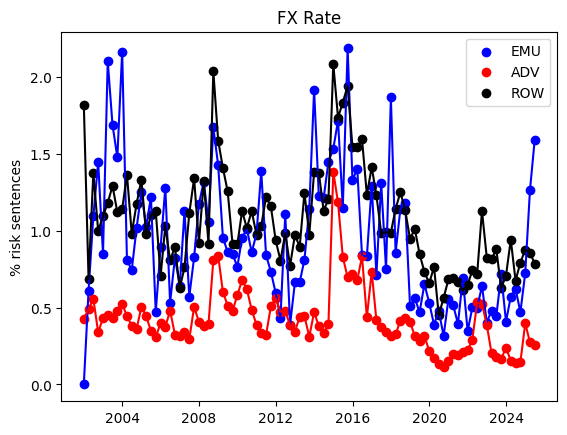

In [34]:
df = pd.read_csv('NLAnalytics_FXrate.csv')
df_unc = pd.read_csv('NLAnalytics_FXrate_unconditional.csv')
df_unc.rename(columns={'nr_of_sentences':'n_of_sentences'},inplace=True)
df_tot = df.merge(df_unc,on='earningscallID',how='inner')
if sum(df_tot['nr_of_sentences'] == df_tot['n_of_sentences'])/len(df_tot) == 1:
    print('Conditional and unconditional archvies have been succesfully merged')
else:
    print('Conditional and unconditional archvies have not been succesfully merged. Please check')

quarter_ref = list()
[quarter_ref.append(pd.to_datetime(quarter,format='%Y-%m-%d') - relativedelta(days=1) ) for quarter in df_tot.date_q];
df_tot['date_q'] = quarter_ref

region = list()
for i in df_tot.index:
    if df_tot.headquarterscountry[i] in emu:
        region.append('EMU')
    elif df_tot.headquarterscountry[i] in adv:
        region.append('ADV')
    else:
        region.append('ROW')
df_tot['region'] = region

df_emu = df_tot.loc[df_tot.region == 'EMU']
tot_sentences_emu = df_emu.resample('QE',on='date_q')['nr_of_sentences'].sum()
exposure_emu = df_emu.resample('QE',on='date_q')['exposure'].sum() 	
risk_emu = df_emu.resample('QE',on='date_q')['risk'].sum() 	
sentiment_emu = df_emu.resample('QE',on='date_q')['sentiment'].sum() 	
positive_emu = df_emu.resample('QE',on='date_q')['positive'].sum() 	
negative_emu = df_emu.resample('QE',on='date_q')['negative'].sum()
positive_unc_emu = df_emu.resample('QE',on='date_q')['unconditional_positive_sentences_count'].sum()
negative_unc_emu = df_emu.resample('QE',on='date_q')['unconditional_negative_sentences_count'].sum()
risk_unc_emu = df_emu.resample('QE',on='date_q')['unconditional_risk_sentences_count'].sum()

df_adv = df_tot.loc[df_tot.region == 'ADV']
tot_sentences_adv = df_adv.resample('QE',on='date_q')['nr_of_sentences'].sum()
exposure_adv = df_adv.resample('QE',on='date_q')['exposure'].sum() 	
risk_adv = df_adv.resample('QE',on='date_q')['risk'].sum() 	
sentiment_adv = df_adv.resample('QE',on='date_q')['sentiment'].sum() 	
positive_adv = df_adv.resample('QE',on='date_q')['positive'].sum() 	
negative_adv = df_adv.resample('QE',on='date_q')['negative'].sum()
positive_unc_adv = df_adv.resample('QE',on='date_q')['unconditional_positive_sentences_count'].sum()
negative_unc_adv = df_adv.resample('QE',on='date_q')['unconditional_negative_sentences_count'].sum()
risk_unc_adv = df_adv.resample('QE',on='date_q')['unconditional_risk_sentences_count'].sum()

df_row = df_tot.loc[df_tot.region == 'ROW']
tot_sentences_row = df_row.resample('QE',on='date_q')['nr_of_sentences'].sum()
exposure_row = df_row.resample('QE',on='date_q')['exposure'].sum() 	
risk_row = df_row.resample('QE',on='date_q')['risk'].sum() 	
sentiment_row = df_row.resample('QE',on='date_q')['sentiment'].sum() 	
positive_row = df_row.resample('QE',on='date_q')['positive'].sum() 	
negative_row = df_row.resample('QE',on='date_q')['negative'].sum()
positive_unc_row = df_row.resample('QE',on='date_q')['unconditional_positive_sentences_count'].sum()
negative_unc_row = df_row.resample('QE',on='date_q')['unconditional_negative_sentences_count'].sum()
risk_unc_row = df_row.resample('QE',on='date_q')['unconditional_risk_sentences_count'].sum()

# df_tariffs = pd.DataFrame(index=quarters)
df_fxrate = pd.DataFrame()
df_fxrate['FXrate_EMU'] = risk_emu/risk_unc_emu*100
df_fxrate['FXrate_ADV'] = risk_adv/risk_unc_adv*100
df_fxrate['FXrate_ROW'] = risk_row/risk_unc_row*100
fig,ax = plt.subplots(1,1)
ax.plot(df_fxrate.FXrate_EMU,color='blue')
ax.scatter(df_fxrate.index,df_fxrate.FXrate_EMU,label='EMU',color='blue')
ax.plot(df_fxrate.FXrate_ADV,color='red')
ax.scatter(df_fxrate.index,df_fxrate.FXrate_ADV,label='ADV',color='red')
ax.plot(df_fxrate.FXrate_ROW,color='k')
ax.scatter(df_fxrate.index,df_fxrate.FXrate_ROW,label='ROW',color='k')
ax.legend()
ax.set_title('FX Rate')
ax.set_ylabel('% risk sentences')
plt.show()

### Risk Index

In [35]:
df_risk_index = pd.concat([df_inflation,df_supplychain,
                           df_monetarypolicy,df_financingconditions,
                           df_covid19,df_geoukraine,df_geomideast,
                           df_tariffs,df_fxrate],axis=1)
col_EMU = list()
[col_EMU.append(col) for col in df_risk_index.columns if 'EMU' in col]
col_ADV = list()
[col_ADV.append(col) for col in df_risk_index.columns if 'ADV' in col]
col_ROW = list()
[col_ROW.append(col) for col in df_risk_index.columns if 'ROW' in col]
df_risk_index['Risk_EMU'] = df_risk_index.loc[:,col_EMU].sum(axis=1)
df_risk_index['Risk_ADV'] = df_risk_index.loc[:,col_ADV].sum(axis=1)
df_risk_index['Risk_ROW'] = df_risk_index.loc[:,col_ROW].sum(axis=1)

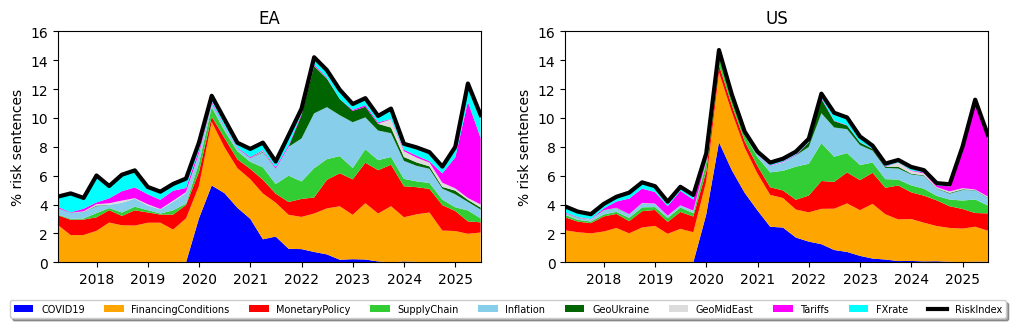

In [40]:
df_risk_index = df_risk_index.loc[datetime(2017,1,1):]

labels = ['COVID19','FinancingConditions','MonetaryPolicy',
          'SupplyChain','Inflation','GeoUkraine','GeoMidEast','Tariffs','FXrate']
colors = ['blue','orange','red','limegreen','skyblue','darkgreen','gainsboro','fuchsia','aqua']
cols_EMU = list()
[cols_EMU.append(col+'_EMU') for col in labels];
cols_ADV = list()
[cols_ADV.append(col+'_ADV') for col in labels];
ymax = round(max(df_risk_index['Risk_EMU'].max(),df_risk_index['Risk_ADV'].max()),0)+1
emu_plot = np.transpose(df_risk_index.loc[:,cols_EMU].to_numpy())
adv_plot = np.transpose(df_risk_index.loc[:,cols_ADV].to_numpy())

fig,axs = plt.subplots(1,2,figsize=(12,3))
axs[0].set_title('EA')
axs[0].stackplot(df_risk_index.index,emu_plot,colors=colors,labels=labels)
axs[0].plot(df_risk_index['Risk_EMU'],color='k',linewidth=3,label='RiskIndex')
axs[0].set_ylabel('% risk sentences')
axs[0].set_ylim([0,ymax])
axs[0].set_xlim([df_risk_index.index[0],df_risk_index.index[-1]])

axs[1].set_title('US')
axs[1].stackplot(df_risk_index.index,adv_plot,colors=colors)
axs[1].plot(df_risk_index['Risk_ADV'],color='k',linewidth=3)
axs[1].set_ylabel('% risk sentences')
axs[1].set_ylim([0,ymax])
axs[1].set_xlim([df_risk_index.index[0],df_risk_index.index[-1]])

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0),fancybox=True, shadow=True, ncol=len(labels)+1,fontsize=7)
plt.savefig('NLAnalytics_Risk_EAUS.png',dpi=200,bbox_inches='tight')
plt.show()

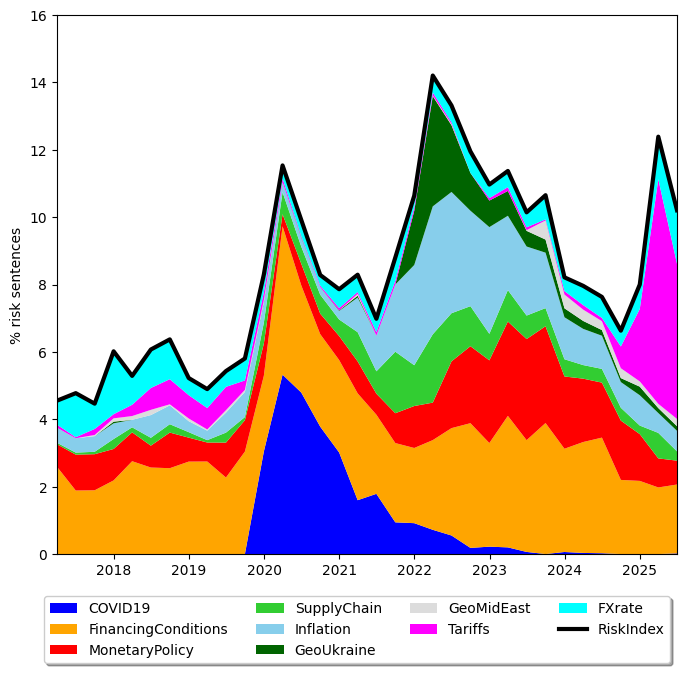

In [41]:
labels = ['COVID19','FinancingConditions','MonetaryPolicy',
          'SupplyChain','Inflation','GeoUkraine','GeoMidEast','Tariffs','FXrate']
colors = ['blue','orange','red','limegreen','skyblue','darkgreen','gainsboro','fuchsia','aqua']
cols_EMU = list()
[cols_EMU.append(col+'_EMU') for col in labels];
cols_ADV = list()
[cols_ADV.append(col+'_ADV') for col in labels];
ymax = round(max(df_risk_index['Risk_EMU'].max(),df_risk_index['Risk_ADV'].max()),0)+1
emu_plot = np.transpose(df_risk_index.loc[:,cols_EMU].to_numpy())
adv_plot = np.transpose(df_risk_index.loc[:,cols_ADV].to_numpy())

fig,axs = plt.subplots(1,1,figsize=(8,7))
# axs.set_title('EA')
axs.stackplot(df_risk_index.index,emu_plot,colors=colors,labels=labels)
axs.plot(df_risk_index['Risk_EMU'],color='k',linewidth=3,label='RiskIndex')
axs.set_ylabel('% risk sentences')
axs.set_ylim([0,ymax])
axs.set_xlim([df_risk_index.index[0],df_risk_index.index[-1]])

fig.legend(loc='upper center', bbox_to_anchor=(0.5,0.06),fancybox=True, shadow=True, ncol=4,fontsize=10)
plt.savefig('NLAnalytics_Risk_EA.png',dpi=200,bbox_inches='tight')
plt.show()

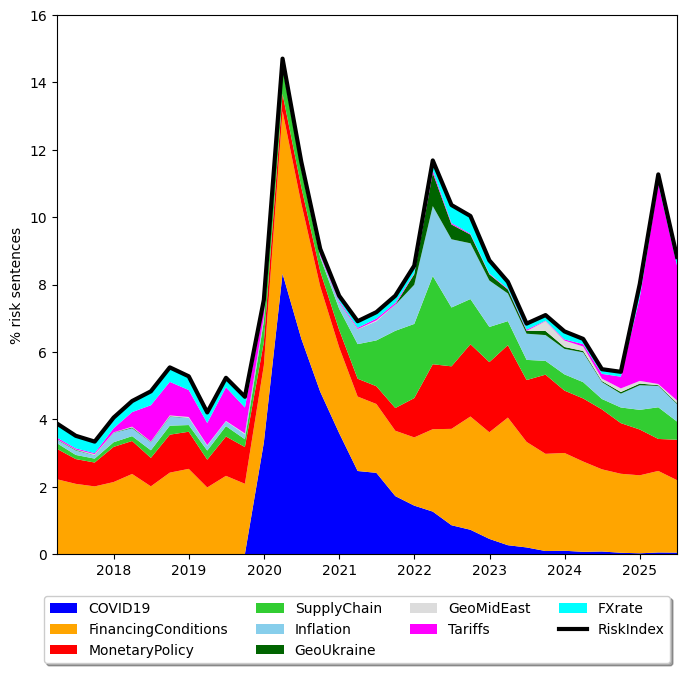

In [42]:
labels = ['COVID19','FinancingConditions','MonetaryPolicy',
          'SupplyChain','Inflation','GeoUkraine','GeoMidEast','Tariffs','FXrate']
colors = ['blue','orange','red','limegreen','skyblue','darkgreen','gainsboro','fuchsia','aqua']
cols_EMU = list()
[cols_EMU.append(col+'_EMU') for col in labels];
cols_ADV = list()
[cols_ADV.append(col+'_ADV') for col in labels];
ymax = round(max(df_risk_index['Risk_EMU'].max(),df_risk_index['Risk_ADV'].max()),0)+1
emu_plot = np.transpose(df_risk_index.loc[:,cols_EMU].to_numpy())
adv_plot = np.transpose(df_risk_index.loc[:,cols_ADV].to_numpy())

fig,axs = plt.subplots(1,1,figsize=(8,7))
# axs.set_title('EA')
axs.stackplot(df_risk_index.index,adv_plot,colors=colors,labels=labels)
axs.plot(df_risk_index['Risk_ADV'],color='k',linewidth=3,label='RiskIndex')
axs.set_ylabel('% risk sentences')
axs.set_ylim([0,ymax])
axs.set_xlim([df_risk_index.index[0],df_risk_index.index[-1]])

fig.legend(loc='upper center', bbox_to_anchor=(0.5,0.06),fancybox=True, shadow=True, ncol=4,fontsize=10)
plt.savefig('NLAnalytics_Risk_US.png',dpi=200,bbox_inches='tight')
plt.show()